## Decision tree/random forests for crustal and lithospheric configurations

We will now look into the performance of decision tree and random forest classifiers. These are a relatively rudimentary methods for data classification. Decision trees are easier to interpret and faster to train than ANNs, but they do not always reach a similar level of accuracy. We will see if they are serviceable to our goals.

In [1]:
# Imports.
import numpy as np
import math as m
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from dtreeviz.trees import dtreeviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Reading in raw data.
anom_df = pd.read_csv("bag_anom.csv")
anom_df.describe()

,x (km),Airy anom (mGal),Bouguer anom (mGal),Geoid anom (mGal)
count,74.000000,74.000000,74.000000,74.000000
mean,1991.183919,0.254370,-13.811054,-1.701378
std,1158.191535,24.654458,41.233023,32.449100
min,73.740000,-49.369000,-106.680000,-87.201000
25%,1028.550000,-14.855500,-31.447250,-11.340750
50%,1991.285000,0.626500,-3.374000,-4.345000
75%,2939.055000,15.243500,10.118000,6.677000
max,3965.210000,56.109000,57.201000,73.660000


In [3]:
anom_df.head()

,x (km),Airy anom (mGal),Bouguer anom (mGal),Geoid anom (mGal)
0,73.74,-3.537,-3.561,0.280
1,127.94,-4.957,-4.776,0.331
2,178.99,-7.785,-7.758,0.903
3,225.63,-13.608,-13.694,1.852
4,261.35,-24.128,-24.250,4.820


In [4]:
# Different types correspond to the diagram in the report.
anom_df['type'] = anom_df['x (km)'].apply(func = (lambda x: 1 if 300.0 <= x <= 600.0
                                                      else 2 if 1000.0 <= x <= 1300.0
                                                      else 3 if 1700.0 <= x <= 2000.0
                                                      else 4 if 2400.0 <= x <= 2700.0
                                                      else 5 if 3200.0 <= x <= 3500.0
                                                      else 6))


In [5]:
# Type6 is the reference configuration with no lithospheric changes.
type_list = ['Type1','Type2','Type3','Type4','Type5','Type6']
output_length = len(type_list)

In [6]:
anom_df.head()

,x (km),Airy anom (mGal),Bouguer anom (mGal),Geoid anom (mGal),type
0,73.74,-3.537,-3.561,0.280,6
1,127.94,-4.957,-4.776,0.331,6
2,178.99,-7.785,-7.758,0.903,6
3,225.63,-13.608,-13.694,1.852,6
4,261.35,-24.128,-24.250,4.820,6


In [7]:
input_list = ['Airy anom (mGal)', 'Bouguer anom (mGal)', 'Geoid anom (mGal)']
X_values = anom_df[input_list].values
y_labels = anom_df['type']

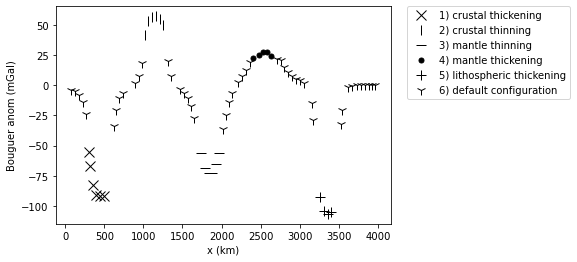

In [8]:
# Testing to see if the type labels
# have been successfully generated.
marker_dict = {1:'x',
               2:'|',
               3:'_',
               4:'.',
               5:'+',
               6:'1'}

legend_labels = ['1) crustal thickening',
                 '2) crustal thinning',
                 '3) mantle thinning',
                 '4) mantle thickening',
                 '5) lithospheric thickening',
                 '6) default configuration']

groups = anom_df.groupby('type')
for name, group in groups:
    plt.plot(group['x (km)'],
             group['Bouguer anom (mGal)'],
             marker=marker_dict[name],
             linestyle='',
             markersize=10,
             label=name,
             color = (0,0,0))
plt.xlabel(xlabel = 'x (km)')
plt.ylabel(ylabel = 'Bouguer anom (mGal)')
plt.legend(bbox_to_anchor = (1.05,1), loc = 'upper left', borderaxespad = 0, labels = legend_labels)

So far, so good. Now we can start training the model.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_values,
                                                    y_labels,
                                                    test_size=0.33,
                                                    random_state=42)

## Decision tree

In [10]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
# Test set predictions.
y_pred = dtree.predict(X_test)
print('Network accuracy on test set = {}'.format(accuracy_score(y_true = y_test, y_pred = y_pred)))
print(classification_report(y_true = y_test, y_pred = y_pred))

Network accuracy on test set = 0.96
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         1
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00        13

    accuracy                           0.96        25
   macro avg       0.94      0.94      0.93        25
weighted avg       0.97      0.96      0.96        25



In [12]:
# Train set predictions.
y_pred = dtree.predict(X_train)
print('Network accuracy on train set = {}'.format(accuracy_score(y_true = y_train, y_pred = y_pred)))
print(classification_report(y_true = y_train, y_pred = y_pred))

Network accuracy on train set = 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00        34

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



In [13]:
# Total set predictions.
y_pred = dtree.predict(X_values)
print('Network accuracy = {}'.format(accuracy_score(y_true = y_labels, y_pred = y_pred)))
print(classification_report(y_true = y_labels, y_pred = y_pred))

Network accuracy = 0.9864864864864865
              precision    recall  f1-score   support

           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         5
           5       0.80      1.00      0.89         4
           6       1.00      1.00      1.00        47

    accuracy                           0.99        74
   macro avg       0.97      0.97      0.97        74
weighted avg       0.99      0.99      0.99        74



Text(0, 0.5, 'Bougeur anom (mGal)')

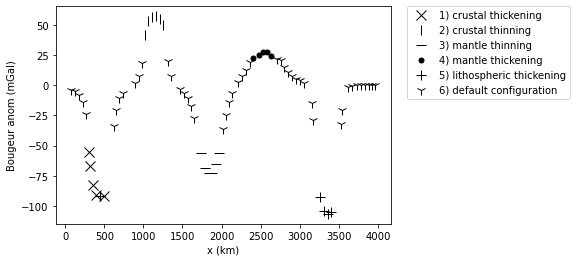

In [14]:
# Plotting the data.
anom_df['type_pred_dtree'] = y_pred
pred_groups = anom_df.groupby('type_pred_dtree')
for name, group in pred_groups:
    plt.plot(group['x (km)'],
             group['Bouguer anom (mGal)'],
             marker=marker_dict[name],
             linestyle='',
             markersize=10,
             label=name,
             color = (0,0,0))
plt.legend(bbox_to_anchor = (1.05,1), loc = 'upper left', borderaxespad = 0, labels = legend_labels)
plt.xlabel(xlabel = "x (km)")
plt.ylabel(ylabel = "Bougeur anom (mGal)")

[Text(372.0, 587.0880000000001, 'Bouguer <= 22.313\ngini = 0.498\nsamples = 49\nvalue = [3, 4, 2, 4, 2, 34]\nclass = Type6'),
 Text(223.20000000000002, 456.624, 'Bouguer <= -46.485\ngini = 0.302\nsamples = 41\nvalue = [3, 0, 2, 0, 2, 34]\nclass = Type6'),
 Text(148.8, 326.1600000000001, 'Airy <= 19.716\ngini = 0.653\nsamples = 7\nvalue = [3, 0, 2, 0, 2, 0]\nclass = Type1'),
 Text(74.4, 195.69600000000003, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 2, 0]\nclass = Type5'),
 Text(223.20000000000002, 195.69600000000003, 'Geoid <= 50.82\ngini = 0.48\nsamples = 5\nvalue = [3, 0, 2, 0, 0, 0]\nclass = Type1'),
 Text(148.8, 65.23200000000008, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0, 0]\nclass = Type1'),
 Text(297.6, 65.23200000000008, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0, 0]\nclass = Type3'),
 Text(297.6, 326.1600000000001, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 0, 0, 0, 34]\nclass = Type6'),
 Text(520.8000000000001, 456.624, 'Bouguer <= 38.553\ngini = 0.5\nsamples =

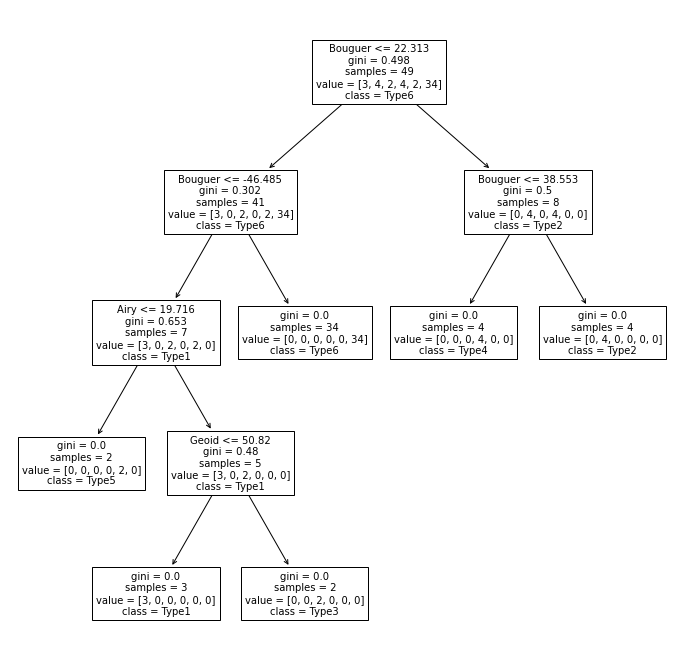

In [15]:
# Plotting the decision tree.
dtree_inputs = ['Airy','Bouguer', 'Geoid']
plt.figure(figsize = (12,12))
plot_tree(decision_tree = dtree,
          feature_names = dtree_inputs,
          class_names = type_list,
          fontsize = 10)

Typically, the decision tree achieves well over 90\% accuracy, which is a good start. This means that we can keep some interpretability of the model without compromising the accuracy.

## Random forest

In [16]:
ranfor = RandomForestClassifier()
ranfor.fit(X_train,y_train)

RandomForestClassifier()

In [17]:
# Test set predictions.
y_pred = ranfor.predict(X_test)
print('Network accuracy on test set = {}'.format(accuracy_score(y_true = y_test, y_pred = y_pred)))
print(classification_report(y_true = y_test, y_pred = y_pred))

Network accuracy on test set = 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00        13

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [18]:
# Train set predictions.
y_pred = ranfor.predict(X_train)
print('Network accuracy on train set = {}'.format(accuracy_score(y_true = y_train, y_pred = y_pred)))
print(classification_report(y_true = y_train, y_pred = y_pred))

Network accuracy on train set = 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00        34

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



In [19]:
# Total set predictions.
y_pred = ranfor.predict(X_values)
print('Network accuracy = {}'.format(accuracy_score(y_true = y_labels, y_pred = y_pred)))
print(classification_report(y_true = y_labels, y_pred = y_pred))

Network accuracy = 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00        47

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



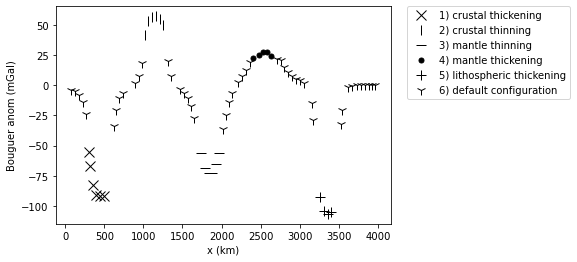

In [20]:
anom_df['type_pred_ranfor'] = y_pred
pred_groups = anom_df.groupby('type_pred_ranfor')
for name, group in pred_groups:
    plt.plot(group['x (km)'],
             group['Bouguer anom (mGal)'],
             marker=marker_dict[name],
             linestyle='',
             markersize=10,
             label=name,
             color = (0,0,0))
plt.xlabel(xlabel = 'x (km)')
plt.ylabel(ylabel = 'Bouguer anom (mGal)')
plt.legend(bbox_to_anchor = (1.05,1), loc = 'upper left', borderaxespad = 0, labels = legend_labels)

[Text(372.0, 605.7257142857143, 'Bouguer <= 23.519\ngini = 0.545\nsamples = 32\nvalue = [3, 6, 4, 2, 2, 32]\nclass = Type6'),
 Text(223.20000000000002, 512.537142857143, 'Bouguer <= -44.426\ngini = 0.374\nsamples = 27\nvalue = [3, 0, 4, 0, 2, 32]\nclass = Type6'),
 Text(148.8, 419.34857142857146, 'Bouguer <= -91.649\ngini = 0.642\nsamples = 7\nvalue = [3, 0, 4, 0, 2, 0]\nclass = Type3'),
 Text(74.4, 326.16, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 2, 0]\nclass = Type5'),
 Text(223.20000000000002, 326.16, 'Airy <= 50.318\ngini = 0.49\nsamples = 5\nvalue = [3, 0, 4, 0, 0, 0]\nclass = Type3'),
 Text(148.8, 232.9714285714286, 'Airy <= 36.118\ngini = 0.375\nsamples = 4\nvalue = [3, 0, 1, 0, 0, 0]\nclass = Type1'),
 Text(74.4, 139.7828571428571, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0, 0, 0]\nclass = Type1'),
 Text(223.20000000000002, 139.7828571428571, 'Geoid <= 51.378\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1, 0, 0, 0]\nclass = Type1'),
 Text(148.8, 46.594285714285775, 'gini =

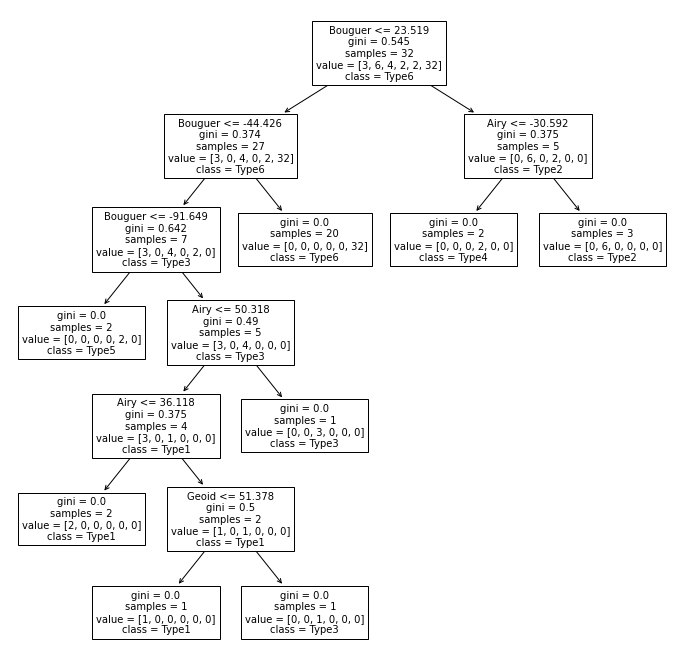

In [21]:
# Prints out tree in forest
# given by tree_index.
plt.figure(figsize = (12,12))
tree_index = 0
plot_tree(decision_tree = ranfor.estimators_[tree_index],
          feature_names = dtree_inputs,
          class_names = type_list,
          fontsize = 10)

In general, the random forest outperforms the decision tree, but at this stage the difference is very slight. Both methods are appropriate when dealing with this kind of problem it seems!

In the previous notebook ("1) K-means"), we found that quadratic features that mix the different anomalies together have provided greater accuracy for the $K$-means model. Let's see if it makes a difference here.

### Using quadratic features in the random forest

In [22]:
# Generating quadratic features using
# difference of two squares and cross terms.
anom_df['f12(A,B)'] = anom_df['Airy anom (mGal)']**2 - anom_df['Bouguer anom (mGal)']**2
anom_df['f12(B,G)'] = anom_df['Bouguer anom (mGal)']**2 - anom_df['Geoid anom (mGal)']**2
anom_df['f12(A,G)'] = anom_df['Airy anom (mGal)']**2 - anom_df['Geoid anom (mGal)']**2
anom_df['f22(A,B)'] = anom_df['Airy anom (mGal)']*anom_df['Bouguer anom (mGal)']
anom_df['f22(B,G)'] = anom_df['Bouguer anom (mGal)']*anom_df['Geoid anom (mGal)']
anom_df['f22(A,G)'] = anom_df['Airy anom (mGal)']*anom_df['Geoid anom (mGal)']

In [23]:
quad_input_list = ['Airy anom (mGal)', 'Bouguer anom (mGal)', 'Geoid anom (mGal)',
              'f12(A,B)', 'f12(B,G)', 'f12(A,G)', 'f22(A,B)', 'f22(B,G)', 'f22(A,G)']
X_values = anom_df[quad_input_list].values
y_labels = anom_df['type']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_values,
                                                    y_labels,
                                                    test_size=0.33,
                                                    random_state=42)

In [25]:
quad_ranfor = RandomForestClassifier()
quad_ranfor.fit(X_train,y_train)

RandomForestClassifier()

In [26]:
# Test set predictions.
y_pred = quad_ranfor.predict(X_test)
print('Network accuracy on test set = {}'.format(accuracy_score(y_true = y_test, y_pred = y_pred)))
print(classification_report(y_true = y_test, y_pred = y_pred))

Network accuracy on test set = 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00        13

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [27]:
# Train set predictions.
y_pred = quad_ranfor.predict(X_train)
print('Network accuracy on train set = {}'.format(accuracy_score(y_true = y_train, y_pred = y_pred)))
print(classification_report(y_true = y_train, y_pred = y_pred))

Network accuracy on train set = 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00        34

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



In [28]:
# Total set predictions.
y_pred = quad_ranfor.predict(X_values)
print('Network accuracy = {}'.format(accuracy_score(y_true = y_labels, y_pred = y_pred)))
print(classification_report(y_true = y_labels, y_pred = y_pred))

Network accuracy = 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00        47

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



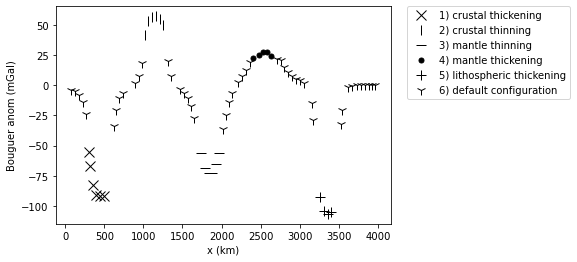

In [29]:
anom_df['type_pred_quad_ranfor'] = y_pred
pred_groups = anom_df.groupby('type_pred_quad_ranfor')
for name, group in pred_groups:
    plt.plot(group['x (km)'],
             group['Bouguer anom (mGal)'],
             marker=marker_dict[name],
             linestyle='',
             markersize=10,
             label=name,
             color = (0,0,0))
plt.xlabel(xlabel = 'x (km)')
plt.ylabel(ylabel = 'Bouguer anom (mGal)')
plt.legend(bbox_to_anchor = (1.05,1), loc = 'upper left', borderaxespad = 0, labels = legend_labels)

[Text(297.6, 570.7800000000001, 'Geoid anom (mGal) <= -20.11\ngini = 0.38\nsamples = 27\nvalue = [0, 5, 0, 4, 2, 38]\nclass = Type6'),
 Text(148.8, 407.70000000000005, 'f12(A,G) <= -2348.31\ngini = 0.494\nsamples = 6\nvalue = [0, 5, 0, 4, 0, 0]\nclass = Type2'),
 Text(74.4, 244.62, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 4, 0, 0]\nclass = Type4'),
 Text(223.20000000000002, 244.62, 'gini = 0.0\nsamples = 3\nvalue = [0, 5, 0, 0, 0, 0]\nclass = Type2'),
 Text(446.40000000000003, 407.70000000000005, 'Geoid anom (mGal) <= 4.265\ngini = 0.095\nsamples = 21\nvalue = [0, 0, 0, 0, 2, 38]\nclass = Type6'),
 Text(372.0, 244.62, 'gini = 0.0\nsamples = 19\nvalue = [0, 0, 0, 0, 0, 35]\nclass = Type6'),
 Text(520.8000000000001, 244.62, 'f22(A,B) <= 243.311\ngini = 0.48\nsamples = 2\nvalue = [0, 0, 0, 0, 2, 3]\nclass = Type6'),
 Text(446.40000000000003, 81.53999999999996, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 2, 0]\nclass = Type5'),
 Text(595.2, 81.53999999999996, 'gini = 0.0\nsamples = 1

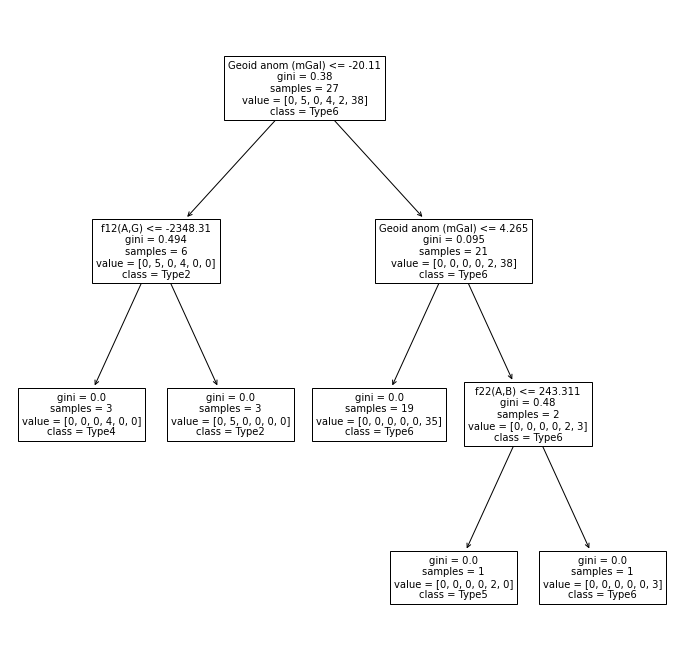

In [30]:
# Prints out tree in forest
# given by tree_index.
plt.figure(figsize = (12,12))
tree_index = 0
plot_tree(decision_tree = quad_ranfor.estimators_[tree_index],
          feature_names = quad_input_list,
          class_names = type_list,
          fontsize = 10)

Now, the random forest consistently gets to 100\% accuracy. Once again, the quadratic features provide beneficial pathways for the model to use to properly bifurcate the data. All the quadratic features are used across the whole forest in general, verifying they are not redundant and can be used in other methods.